In [16]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Read all the parquet files matching the pattern `./week_1/data/raw/train_*.parquet`

In [11]:
train_files = glob.glob('./week_1/data/raw/train_*.parquet')
train_df = pd.concat([pd.read_parquet(file) for file in train_files], ignore_index=True)
train_df.info()
print(f"Memory usage: {train_df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")
print(f"Max date: {train_df['date'].max()}")
print(f"Min date: {train_df['date'].min()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

### Count of distinct customer_ids per month using the 'date' column

In [23]:
monthly_counts

,month,customer_id
0,2008-01,75
1,2008-02,205
2,2008-03,289
3,2008-04,301
4,2008-05,338
...,...,...
187,2023-08,7867
188,2023-09,7692
189,2023-10,7853
190,2023-11,7650


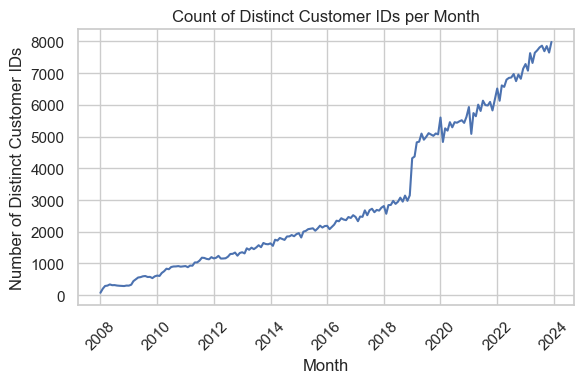

In [30]:
train_df['month'] = train_df['date'].dt.to_period('M').dt.to_timestamp()
monthly_counts = train_df.groupby('month')['customer_id'].nunique().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=monthly_counts, x='month', y='customer_id')
plt.xlabel('Month')
plt.ylabel('Number of Distinct Customer IDs')
plt.title('Count of Distinct Customer IDs per Month')
plt.xticks(rotation=45)
plt.tight_layout()

### Read the file `./week_1/data/raw/test.parquet`

In [ ]:
test_df = pd.read_parquet('./week_1/data/raw/test.parquet')
print(f"Max date: {test_df['date'].max()}")
print(f"Min date: {test_df['date'].min()}")